In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers.convolutional import Conv1D
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.layers import TimeDistributed
from keras.models import Model
from keras import regularizers
from keras.layers  import  LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector
from keras.models import Model
import tensorflow as tf



from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
# Multiple Inputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import load_model
import math, sys, time
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU, TimeDistributed, LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from pandas._testing import assert_frame_equal
from pandas.testing import assert_index_equal
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

2023-02-09 15:10:57.409486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from EEGP import EEGPreprocessor
import pandas as pd
import numpy as np
from sklearn.utils import resample
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pywt

In [3]:
path = "/Users/charleshajjar/Documents/DataAnalyse/ernergy2/"

In [4]:
import os
import pandas as pd

def concat_csv_files(folder_path):
    """
    Cette fonction parcourt un dossier, récupère tous les fichiers CSV,
    vérifie le nombre de colonnes et qu'il n'y a pas de ligne vide,
    puis les regroupe en un seul dataframe.
    """
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    dataframes = []
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        if df.columns.size == len(df.columns.unique()):
            if df.dropna().empty:
                print(f"Le fichier {file} a des lignes vides")
                continue
            dataframes.append(df)
        else:
            print(f"Le fichier {file} a des colonnes en double")
            continue
    return pd.concat(dataframes, axis=0, ignore_index=True)

In [5]:
df = concat_csv_files(path)

In [6]:
df

,Relative Energy,Target,Direction,p_value_fdr,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gyroscope Z,Mean Spectral Accel X,Mean Spectral Accel Y,Mean Spectral Accel Z,Mean Spectral Gyro X,Mean Spectral Gyro Y,Mean Spectral Gyro Z,Label
0,20.447490,Penser,Right,1.000000,0.020752,0.983154,-0.143555,-1.251220,-0.091553,2.288820,0.338951,0.383017,0.374071,0.055162,0.399719,0.802777,Right
1,28.645356,Penser,Right,0.945376,0.026790,0.981586,-0.143132,-1.022339,-1.450759,2.716064,0.724498,1.005558,6.578094,2.509047,5.329700,2.140942,Right
2,13.404221,Penser,Right,0.845271,0.039795,0.977295,-0.143066,-0.640869,0.244141,1.770020,0.322463,0.523218,0.347416,0.071291,0.267545,0.837102,Right
3,8.039126,Non penser,Up,0.845271,0.092163,0.981689,-0.166992,-1.449585,1.937870,0.595093,0.393523,0.387324,2.418248,0.796615,2.048626,1.207840,Non
4,21.205371,Penser,None,0.845271,0.029729,0.978985,-0.140043,-0.680777,-0.730075,1.664382,0.737491,1.280517,6.426916,2.434818,5.297470,2.484360,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,10.229208,Penser,None,0.005764,0.011068,0.934815,-0.303385,-0.356038,1.658120,0.854492,0.560617,1.037178,2.152684,0.718992,1.613904,1.744499,Non
12495,13.707484,Non penser,None,0.005764,0.050201,0.923554,-0.336945,-1.102445,2.182006,1.007081,0.701386,1.038778,4.273101,1.400744,3.689145,2.125173,Non
12496,10.521441,Penser,None,0.005764,0.015137,0.931641,-0.304443,-0.488281,1.861570,0.793457,0.381053,0.646569,1.628854,0.545845,1.250442,1.195055,Non
12497,14.787505,Non penser,None,0.005764,0.031304,0.925564,-0.316759,-0.735813,2.254909,0.966391,0.772753,1.345373,4.616291,1.526216,3.918733,2.382440,Non


In [7]:
def create_label_column(df):
    df['Label'] = ''
    mask = (df['Target'] == 'Penser') & (df['p_value_fdr'] > 0.55)
    df.loc[mask, 'Label'] = df.loc[mask, 'Direction']
    df.loc[~mask, 'Label'] = "Non"
    return df

In [8]:
df2 = create_label_column(df)

In [9]:
df2

,Relative Energy,Target,Direction,p_value_fdr,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gyroscope Z,Mean Spectral Accel X,Mean Spectral Accel Y,Mean Spectral Accel Z,Mean Spectral Gyro X,Mean Spectral Gyro Y,Mean Spectral Gyro Z,Label
0,20.447490,Penser,Right,1.000000,0.020752,0.983154,-0.143555,-1.251220,-0.091553,2.288820,0.338951,0.383017,0.374071,0.055162,0.399719,0.802777,Right
1,28.645356,Penser,Right,0.945376,0.026790,0.981586,-0.143132,-1.022339,-1.450759,2.716064,0.724498,1.005558,6.578094,2.509047,5.329700,2.140942,Right
2,13.404221,Penser,Right,0.845271,0.039795,0.977295,-0.143066,-0.640869,0.244141,1.770020,0.322463,0.523218,0.347416,0.071291,0.267545,0.837102,Right
3,8.039126,Non penser,Up,0.845271,0.092163,0.981689,-0.166992,-1.449585,1.937870,0.595093,0.393523,0.387324,2.418248,0.796615,2.048626,1.207840,Non
4,21.205371,Penser,None,0.845271,0.029729,0.978985,-0.140043,-0.680777,-0.730075,1.664382,0.737491,1.280517,6.426916,2.434818,5.297470,2.484360,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,10.229208,Penser,None,0.005764,0.011068,0.934815,-0.303385,-0.356038,1.658120,0.854492,0.560617,1.037178,2.152684,0.718992,1.613904,1.744499,Non
12495,13.707484,Non penser,None,0.005764,0.050201,0.923554,-0.336945,-1.102445,2.182006,1.007081,0.701386,1.038778,4.273101,1.400744,3.689145,2.125173,Non
12496,10.521441,Penser,None,0.005764,0.015137,0.931641,-0.304443,-0.488281,1.861570,0.793457,0.381053,0.646569,1.628854,0.545845,1.250442,1.195055,Non
12497,14.787505,Non penser,None,0.005764,0.031304,0.925564,-0.316759,-0.735813,2.254909,0.966391,0.772753,1.345373,4.616291,1.526216,3.918733,2.382440,Non


In [10]:
df2.Label.value_counts()

Non      12377
Up          28
Right       27
None        25
Down        25
Left        17
Name: Label, dtype: int64

In [11]:
le = LabelEncoder()
le.fit(df2["Target"])
df2["Target"] = le.transform(df2["Target"])

In [12]:
le = LabelEncoder()
le.fit(df2["Label"])
df2["Label"] = le.transform(df2["Label"])

/var/folders/3l/4xwf62fd4zs9w79rml6s6b800000gn/T/ipykernel_9852/3736092020.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)


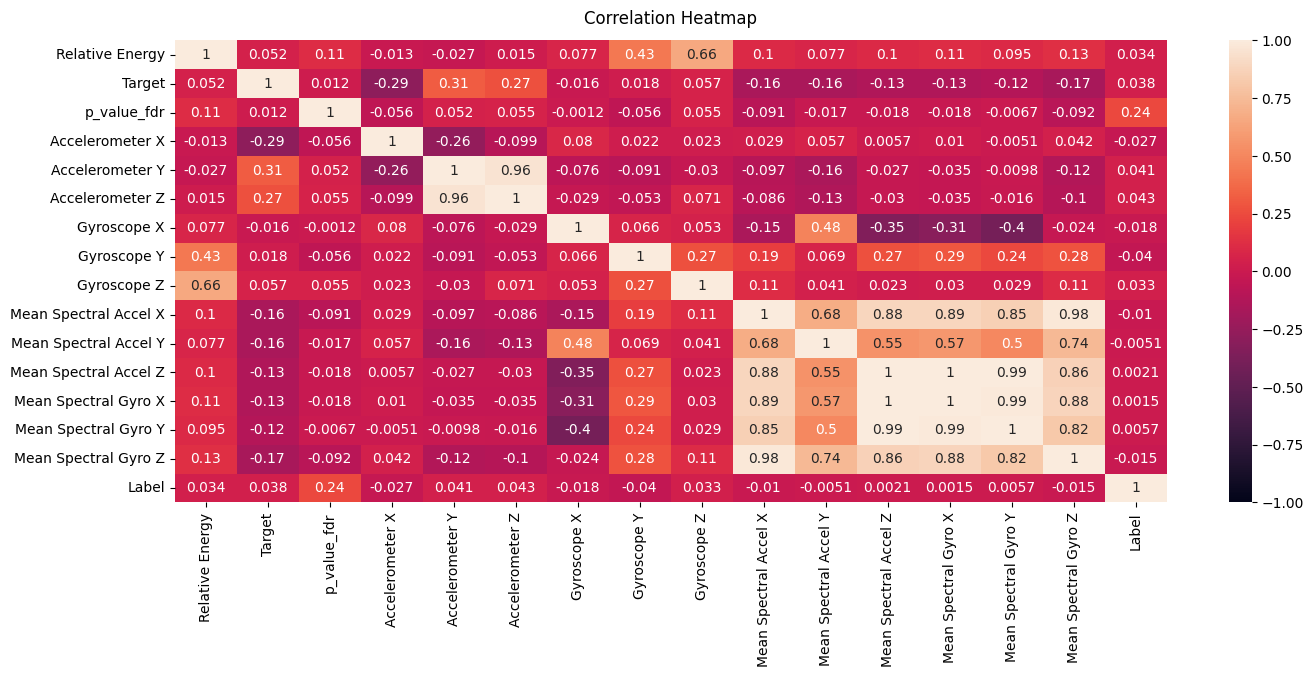

In [13]:
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [14]:
df2.columns

Index(['Relative Energy', 'Target', 'Direction', 'p_value_fdr',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'Mean Spectral Accel X',
       'Mean Spectral Accel Y', 'Mean Spectral Accel Z',
       'Mean Spectral Gyro X', 'Mean Spectral Gyro Y', 'Mean Spectral Gyro Z',
       'Label'],
      dtype='object')

In [16]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X = df2[['Relative Energy', 'Target', 'p_value_fdr',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'Mean Spectral Accel X',
       'Mean Spectral Accel Y', 'Mean Spectral Accel Z',
       'Mean Spectral Gyro X', 'Mean Spectral Gyro Y', 'Mean Spectral Gyro Z']].values
y = df2["Label"].values
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
scaler = StandardScaler()
X_ = scaler.fit_transform(X,y)

Counter({2: 12377, 5: 28, 4: 27, 3: 25, 0: 25, 1: 17})
Counter({2: 12377, 1: 12376, 5: 12370, 4: 12369, 3: 12367, 0: 12367})


In [17]:
# Séparation en données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(59380, 15)

In [19]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_val)

In [20]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.9999326417890341


In [22]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [25]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['Relative Energy', 'Target', 'p_value_fdr',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'Mean Spectral Accel X',
       'Mean Spectral Accel Y', 'Mean Spectral Accel Z',
       'Mean Spectral Gyro X', 'Mean Spectral Gyro Y', 'Mean Spectral Gyro Z']).sort_values(ascending=False)
feature_imp

p_value_fdr              0.205463
Relative Energy          0.122480
Gyroscope Z              0.070065
Gyroscope Y              0.066552
Accelerometer X          0.064192
Gyroscope X              0.059515
Mean Spectral Accel Y    0.058121
Accelerometer Z          0.056800
Accelerometer Y          0.054194
Mean Spectral Gyro Z     0.049892
Mean Spectral Accel X    0.043872
Mean Spectral Gyro Y     0.039719
Mean Spectral Gyro X     0.038707
Mean Spectral Accel Z    0.035646
Target                   0.034782
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


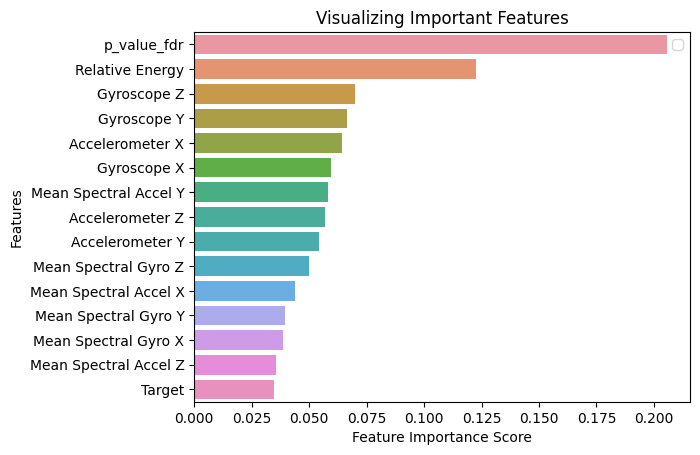

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [27]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 1.000 (0.000)


In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [30]:
input_shape = (59380, 15)
n_classes = 6

In [31]:
class GatedActivationUnit(keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate

def wavenet_residual_block(inputs, n_filters, dilation_rate):
    z = keras.layers.Conv1D(2 * n_filters, kernel_size=2, padding="causal",
                            dilation_rate=dilation_rate)(inputs)
    z = GatedActivationUnit()(z)
    z = keras.layers.Bidirectional(LSTM(n_filters, activation='relu', return_sequences=True))(z)
    z = GatedActivationUnit()(z)
    z = keras.layers.Bidirectional(GRU(n_filters, activation='relu', return_sequences=True))(z)
    z = keras.layers.Conv1D(n_filters, kernel_size=1)(z)
    return keras.layers.Add()([z, inputs]), z

def create_model(input_shape, n_classes):
    n_layers_per_block = 10 # 10 in the paper
    n_blocks = 3 # 3 in the paper
    n_filters = 20# 128 in the paper
    inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
    z= keras.layers.Conv1D(filters=20, kernel_size=1, strides=1, padding="valid")(inputs)
    skip_to_last = []
    for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
        z, skip = wavenet_residual_block(z, n_filters, dilation_rate)
        skip_to_last.append(skip)
    z = keras.activations.relu(keras.layers.Add()(skip_to_last))
    z = keras.layers.Conv1D(n_filters, kernel_size=1, activation="relu")(z)
    z = keras.layers.GlobalAveragePooling1D()(z)
    outputs = keras.layers.Dense(n_classes, activation="softmax")(z)
    model = keras.models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [32]:
model = create_model(input_shape,6)

2023-02-09 15:31:55.852780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.fit(X_train, y_train, epochs=30, batch_size=62, validation_data=(X_val, y_val), shuffle = True)

Epoch 1/30
958/958 [==============================] - 806s 701ms/step - loss: 1.1340 - accuracy: 0.5008 - val_loss: 0.6700 - val_accuracy: 0.7320
Epoch 2/30
958/958 [==============================] - 661s 690ms/step - loss: 0.4455 - accuracy: 0.8282 - val_loss: 0.2768 - val_accuracy: 0.8952
Epoch 3/30
958/958 [==============================] - 658s 687ms/step - loss: 0.1952 - accuracy: 0.9286 - val_loss: 0.1039 - val_accuracy: 0.9634
Epoch 4/30
958/958 [==============================] - 669s 699ms/step - loss: 0.0995 - accuracy: 0.9636 - val_loss: 0.0883 - val_accuracy: 0.9683
Epoch 5/30
958/958 [==============================] - 667s 696ms/step - loss: 0.0731 - accuracy: 0.9747 - val_loss: 0.0710 - val_accuracy: 0.9735
Epoch 6/30
958/958 [==============================] - 674s 703ms/step - loss: 0.0684 - accuracy: 0.9769 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 7/30
958/958 [==============================] - 684s 714ms/step - loss: 0.0544 - accuracy: 0.9817 - val_loss: 0.0323 -

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 15, 20)       40          ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 15, 40)       1640        ['conv1d[0][0]']                 
                                                                                                  
 gated_activation_unit (GatedAc  (None, 15, 20)      0           ['conv1d_1[0][0]']               
 tivationUnit)                                                                                

                                                                                                  
 gated_activation_unit_8 (Gated  (None, 15, 20)      0           ['conv1d_9[0][0]']               
 ActivationUnit)                                                                                  
                                                                                                  
 bidirectional_8 (Bidirectional  (None, 15, 40)      6560        ['gated_activation_unit_8[0][0]']
 )                                                                                                
                                                                                                  
 gated_activation_unit_9 (Gated  (None, 15, 20)      0           ['bidirectional_8[0][0]']        
 ActivationUnit)                                                                                  
                                                                                                  
 bidirecti

 gated_activation_unit_17 (Gate  (None, 15, 20)      0           ['bidirectional_16[0][0]']       
 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_17 (Bidirectiona  (None, 15, 40)      5040        ['gated_activation_unit_17[0][0]'
 l)                                                              ]                                
                                                                                                  
 conv1d_18 (Conv1D)             (None, 15, 20)       820         ['bidirectional_17[0][0]']       
                                                                                                  
 add_8 (Add)                    (None, 15, 20)       0           ['conv1d_18[0][0]',              
                                                                  'add_7[0][0]']                  
          

                                                                                                  
 add_12 (Add)                   (None, 15, 20)       0           ['conv1d_26[0][0]',              
                                                                  'add_11[0][0]']                 
                                                                                                  
 conv1d_27 (Conv1D)             (None, 15, 40)       1640        ['add_12[0][0]']                 
                                                                                                  
 gated_activation_unit_26 (Gate  (None, 15, 20)      0           ['conv1d_27[0][0]']              
 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_26 (Bidirectiona  (None, 15, 40)      6560        ['gated_activation_unit_26[0][0]'
 l)       

 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_34 (Bidirectiona  (None, 15, 40)      6560        ['gated_activation_unit_34[0][0]'
 l)                                                              ]                                
                                                                                                  
 gated_activation_unit_35 (Gate  (None, 15, 20)      0           ['bidirectional_34[0][0]']       
 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_35 (Bidirectiona  (None, 15, 40)      5040        ['gated_activation_unit_35[0][0]'
 l)                                                              ]                                
          

                                                                                                  
 bidirectional_43 (Bidirectiona  (None, 15, 40)      5040        ['gated_activation_unit_43[0][0]'
 l)                                                              ]                                
                                                                                                  
 conv1d_44 (Conv1D)             (None, 15, 20)       820         ['bidirectional_43[0][0]']       
                                                                                                  
 add_21 (Add)                   (None, 15, 20)       0           ['conv1d_44[0][0]',              
                                                                  'add_20[0][0]']                 
                                                                                                  
 conv1d_45 (Conv1D)             (None, 15, 40)       1640        ['add_21[0][0]']                 
          

                                                                  'add_24[0][0]']                 
                                                                                                  
 conv1d_53 (Conv1D)             (None, 15, 40)       1640        ['add_25[0][0]']                 
                                                                                                  
 gated_activation_unit_52 (Gate  (None, 15, 20)      0           ['conv1d_53[0][0]']              
 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_52 (Bidirectiona  (None, 15, 40)      6560        ['gated_activation_unit_52[0][0]'
 l)                                                              ]                                
                                                                                                  
 gated_act

                                                                  'conv1d_18[0][0]',              
                                                                  'conv1d_20[0][0]',              
                                                                  'conv1d_22[0][0]',              
                                                                  'conv1d_24[0][0]',              
                                                                  'conv1d_26[0][0]',              
                                                                  'conv1d_28[0][0]',              
                                                                  'conv1d_30[0][0]',              
                                                                  'conv1d_32[0][0]',              
                                                                  'conv1d_34[0][0]',              
                                                                  'conv1d_36[0][0]',              
          

In [35]:
model.save('/Users/charleshajjar/Documents/DataAnalyse/ernergy2/Al_Hajj')

INFO:tensorflow:Assets written to: /Users/charleshajjar/Documents/DataAnalyse/ernergy2/Al_Hajj/assets


INFO:tensorflow:Assets written to: /Users/charleshajjar/Documents/DataAnalyse/ernergy2/Al_Hajj/assets
